In [1]:
# Let's create, process a dataframe with 100M claims records
# Do some data processing on it 

# Idea: My New $300 Data Science PC only have 16GB of RAM.
# How to do Data Engineering on any budget?
# Answer: To process them pieces at a time :)

In [2]:
import pandas as pd
import numpy as np
import random
import math
import h5py

In [3]:
sample_size = 1000000000

In [4]:
# number of records to process
print(sample_size)

# at each iteration i shall process only 1M rows
# so I don't crash my Linux machine and server
loop_size = 10000000
loop_count = math.ceil(sample_size/loop_size)

1000000000


In [5]:
def method_01_for_loop(loop_size, loop_count):
    for i in range(loop_count):
        # write feedback to user on the same line
        print('\r>> processing: {0:.2f}%'.format(i/loop_count*100), sep='', end='')

        with open('DW_Claim.txt', 'a') as f:
            # this does not work if your range is smaller than sample size
            # member_numbers = random.sample(range(99999), loop_size)

            member_numbers = [str(int(9999 * random.random())) for _ in range(loop_size)]

            for number in member_numbers:
                f.write(number)
                f.write('\n')

            member_numbers = None
        
# But this is really really slow, how can I do better?

In [6]:
# https://stackoverflow.com/a/27384379
# writing a block of code at once

def method_02_write_block(loop_size, loop_count):
    for i in range(loop_count):
        # write feedback to user on the same line
        print('\r>> processing: {0:.2f}%'.format(i/loop_count*100), sep='', end='')

        with open('DW_Claim_2.txt', 'a') as f:
            f.write('\n'.join([str(int(9999 * random.random())) for _ in range(loop_size)]))
        
# What is the effect on how much to "tune" your program?

In [7]:
# Reference link
# https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.randint.html#numpy.random.randint

def method_03_hdf5(loop_size, loop_count):
    s = pd.Series(np.random.randint(1000, 9999, size=loop_size, dtype='int16'))
    f = h5py.File('myfile.hdf5','w')
    group = f.create_group('a_group')
    group.create_dataset(name='matrix', data=s, chunks=True, compression='gzip')
    f.close()
    s = None

# How to print percentage to 2 decimal points?
# https://stackoverflow.com/a/455634

# How to print on the same line
# https://stackoverflow.com/q/7715594

In [8]:
%time method_01_for_loop(10000000, 10)

>> processing: 90.00%CPU times: user 1min 6s, sys: 2.44 s, total: 1min 9s
Wall time: 1min 9s


In [9]:
%time method_02_write_block(10000000, 10)

>> processing: 90.00%CPU times: user 42.7 s, sys: 2.32 s, total: 45 s
Wall time: 45.1 s


In [10]:
%time method_03_hdf5(100000000, 1)

CPU times: user 6.33 s, sys: 196 ms, total: 6.52 s
Wall time: 9.95 s


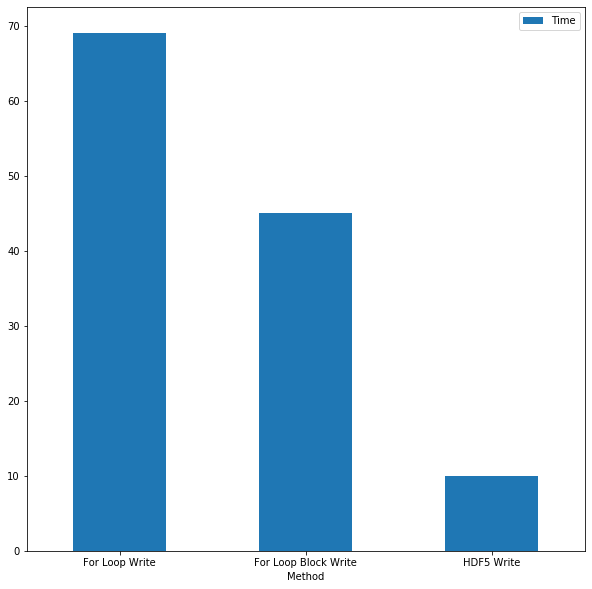

In [20]:
# Execution Time Analysis for 100M rows generate
df = pd.DataFrame([['For Loop Write', 69],
                  ['For Loop Block Write', 45],
                  ['HDF5 Write', 9.95]], columns=['Method', 'Time'])

df.plot.bar(x='Method', y='Time', figsize=(10, 10), rot=False)